In [ ]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import pickle

from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from tpot import TPOTClassifier
import pickle
import yellowbrick 
import xgboost as xgb
from yellowbrick.classifier import ClassificationReport

In [3]:
#import data
df=pd.read_pickle('./data/dummied_122.pkl')

df.shape

(55321, 149)

In [18]:
# Explore the dependent variable 
df.status_group.value_counts()

functional                 30021
non functional             21424
functional needs repair     3876
Name: status_group, dtype: int64

In [4]:
#baseline
df.status_group.value_counts(normalize=True)

functional                 0.542669
non functional             0.387267
functional needs repair    0.070064
Name: status_group, dtype: float64

In [5]:
#encode labels
le=LabelEncoder()
df.status_group = le.fit_transform(df.status_group)

In [33]:
list(le.classes_)

['functional', 'functional needs repair', 'non functional']

In [23]:
df.head(5)

,gps_height,population,status_group,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,district_code_0,district_code_1,district_code_13,district_code_2,district_code_23,district_code_3,district_code_30,district_code_33,district_code_4,district_code_43,district_code_5,district_code_53,district_code_6,district_code_62,district_code_63,district_code_7,district_code_8,district_code_80,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,installer_0,installer_Central government,installer_Commu,installer_DANIDA,installer_DWE,installer_Government,installer_Hesawa,installer_KKKT,installer_OTHER,installer_RWE,installer_TCRS,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,cluster_-1,cluster_0,cluster_1,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_2,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,1390,109.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1399,280.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,686,250.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,263,58.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,150.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# train,test,split
X =df.drop('status_group',axis=1)
y=df.status_group

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape) 

Shapes
X_train: (44256, 148)
X_test: (11065, 148)
y_train: (44256,)
y_test: (11065,)


In [8]:
#scale and transform the predictive dataset in both test and train forms
ss = StandardScaler()
X_train_s= ss.fit_transform(X_train) # saved the mean and std from X_train
X_test_s=ss.transform(X_test)

In [9]:
#baseline
y.value_counts(normalize=True)

0    0.542669
2    0.387267
1    0.070064
Name: status_group, dtype: float64

In [10]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
#initialize grid search and Logistic regression

lr = LogisticRegression(n_jobs=-1)
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
# Train the model using the training sets
clf.fit(X_train_s, y_train)

print("LR train score :")
print(clf.score(X_train_s, y_train))
print('')
print("LR test score  :")
print("Test Score: %.2f" % clf.score(X_test_s, y_test))


/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [37]:
# Linear regression
# lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train_s, y_train)
lr_y_pred = lr.predict(X_test_s)
print("LR train score :")
print(lr.score(X_train_s, y_train))
print('')
print("LR test score  :")

print(lr.score(X_test_s, y_test))



/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LR train score :
0.7322848879248012

LR test score  :
0.7283325802078626


/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


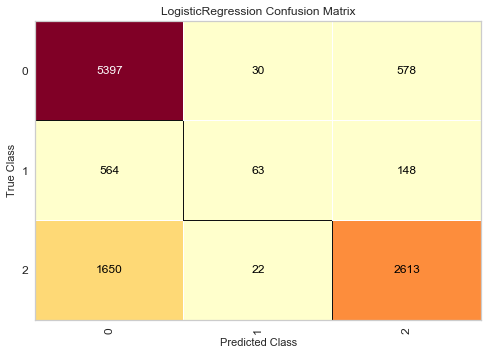

In [98]:
# The ConfusionMatrix visualizer 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lr, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

### using auto machine learning algorithem

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


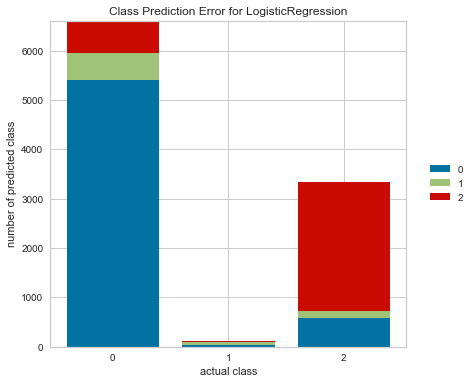

In [100]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    lr, classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


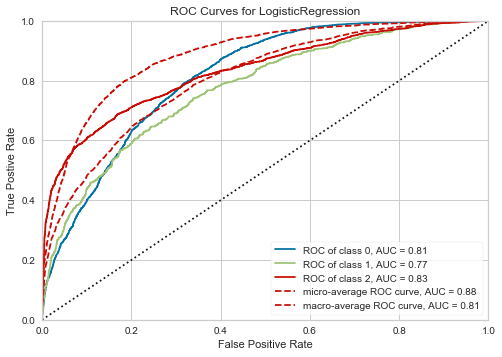

In [101]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   


In [42]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2,n_jobs=-1)
tpot.fit(X_train, y_train)
print(tpot.score(X_train, y_train))
print(tpot.score(X_test, y_test))
tpot.export('tpot_airBnb_pipeline.py')

Optimization Progress:  37%|███▋      | 44/120 [32:30<2:03:16, 97.32s/pipeline]  

Generation 1 - Current best internal CV score: 0.7814985154940761


Optimization Progress:  59%|█████▉    | 71/120 [1:50:41<4:30:39, 331.41s/pipeline] 

Generation 2 - Current best internal CV score: 0.7814985154940761


Optimization Progress:  79%|███████▉  | 95/120 [2:15:49<1:05:01, 156.08s/pipeline]

Generation 3 - Current best internal CV score: 0.7814985154940761




TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100)
0.8445408532176428
0.7876186172616357


True

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
xgb = XGBClassifier(nthreads=-1)  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": [100, 250, 500,1000],
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}


clf = RandomizedSearchCV(xgb, params, n_jobs=5, cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(X_train, y_train)


# The train score
print("Train Score: %.2f" % clf.score(X_train, y_train))

# The test score
print("Test Score: %.2f" % clf.score(X_test, y_test))

best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('accuracy:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] colsample_bytree=0.948044500975003, gamma=6.871553017181615, learning_rate=0.1030735375032072, max_depth=34, min_child_weight=33.16161501512816, n_estimators=250, reg_alpha=8.960424877290999, subsample=0.9945486335739034 
[CV] colsample_bytree=0.948044500975003, gamma=6.871553017181615, learning_rate=0.1030735375032072, max_depth=34, min_child_weight=33.16161501512816, n_estimators=250, reg_alpha=8.960424877290999, subsample=0.9945486335739034 
[CV] colsample_bytree=0.948044500975003, gamma=6.871553017181615, learning_rate=0.1030735375032072, max_depth=34, min_child_weight=33.16161501512816, n_estimators=250, reg_alpha=8.960424877290999, subsample=0.9945486335739034 
[CV] colsample_bytree=0.948044500975003, gamma=6.871553017181615, learning_rate=0.1030735375032072, max_depth=34, min_child_weight=33.16161501512816, n_estimators=250, reg_alpha=8.960424877290999, subsample=0.9945486335739034 
[CV] colsample_bytree=0.9480445

[CV]  colsample_bytree=0.9116540248096396, gamma=9.36650736914847, learning_rate=0.13642271441950715, max_depth=6, min_child_weight=9.85469051030137, n_estimators=100, reg_alpha=147.45002181050603, subsample=0.8837093021766838, total= 2.5min
[CV] colsample_bytree=0.9470041978354612, gamma=1.9676674849800035, learning_rate=0.3770024568625271, max_depth=31, min_child_weight=67.2160934025977, n_estimators=500, reg_alpha=63.52093781760709, subsample=0.8060520511121558 
[CV]  colsample_bytree=0.9116540248096396, gamma=9.36650736914847, learning_rate=0.13642271441950715, max_depth=6, min_child_weight=9.85469051030137, n_estimators=100, reg_alpha=147.45002181050603, subsample=0.8837093021766838, total= 2.5min
[CV] colsample_bytree=0.9470041978354612, gamma=1.9676674849800035, learning_rate=0.3770024568625271, max_depth=31, min_child_weight=67.2160934025977, n_estimators=500, reg_alpha=63.52093781760709, subsample=0.8060520511121558 
[CV]  colsample_bytree=0.9116540248096396, gamma=9.366507369

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 194.7min


[CV]  colsample_bytree=0.9239508698286014, gamma=5.385837913277428, learning_rate=0.21123870186123067, max_depth=31, min_child_weight=237.2893395802569, n_estimators=500, reg_alpha=211.64277483407506, subsample=0.9997540795620485, total=150.5min
[CV] colsample_bytree=0.8911396433690076, gamma=3.341088625609805, learning_rate=0.3752224495345799, max_depth=23, min_child_weight=91.64536637986893, n_estimators=500, reg_alpha=10.395139619467075, subsample=0.9724162892358911 
[CV]  colsample_bytree=0.9239508698286014, gamma=5.385837913277428, learning_rate=0.21123870186123067, max_depth=31, min_child_weight=237.2893395802569, n_estimators=500, reg_alpha=211.64277483407506, subsample=0.9997540795620485, total=150.4min
[CV] colsample_bytree=0.8911396433690076, gamma=3.341088625609805, learning_rate=0.3752224495345799, max_depth=23, min_child_weight=91.64536637986893, n_estimators=500, reg_alpha=10.395139619467075, subsample=0.9724162892358911 
[CV]  colsample_bytree=0.9239508698286014, gamma=5

[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed: 389.0min finished


Train Score: 0.78
Test Score: 0.77
accuracy: 0.7641223788864787
colsample_bytree: 0.8911396433690076
gamma: 3.341088625609805
learning_rate: 0.3752224495345799
max_depth: 23
min_child_weight: 91.64536637986893
n_estimators: 500
reg_alpha: 10.395139619467075
subsample: 0.9724162892358911


In [85]:
y.value_counts()

0    30021
2    21424
1     3876
Name: status_group, dtype: int64

In [90]:
from yellowbrick.features.importances import FeatureImportances

In [99]:
feature_importances=pd.DataFrame(columns=['feature','importance'])

feature_importances['feature']= X_train.columns

feature_importances['importance']=lr.feature_importances_

feature_importances= feature_importances.set_index('feature')

feature_importances['importance'].sort_values(ascending = False).head(15).plot(kind='barh');

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

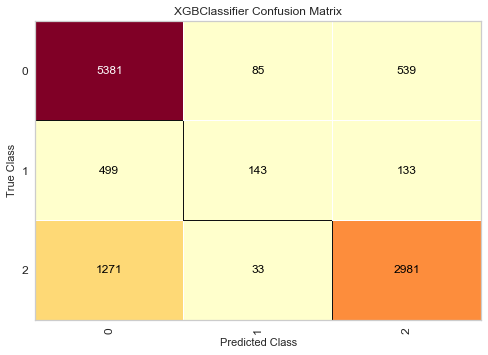

In [88]:
# The ConfusionMatrix visualizer taxes a model
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(xgb, classes=[0,1,2])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

In [90]:
from yellowbrick.features.importances import FeatureImportances

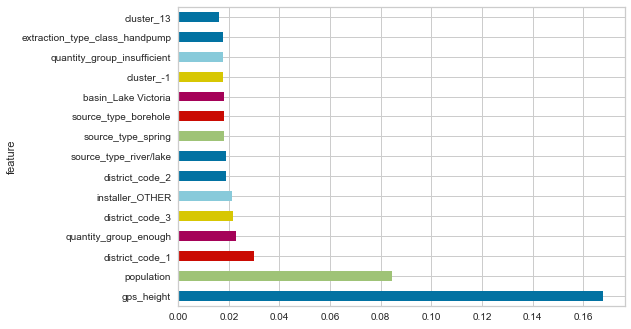

In [93]:
feature_importances=pd.DataFrame(columns=['feature','importance'])

feature_importances['feature']= X_train.columns

feature_importances['importance']=xgb.feature_importances_

feature_importances= feature_importances.set_index('feature')

feature_importances['importance'].sort_values(ascending = False).head(15).plot(kind='barh');

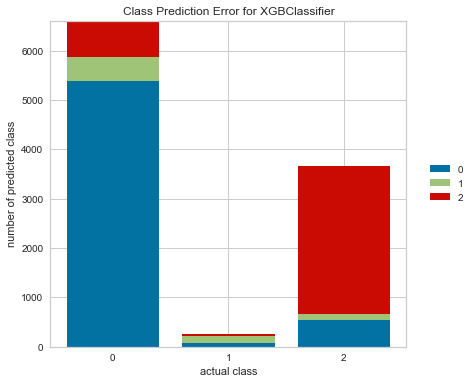

In [94]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    xgb, classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

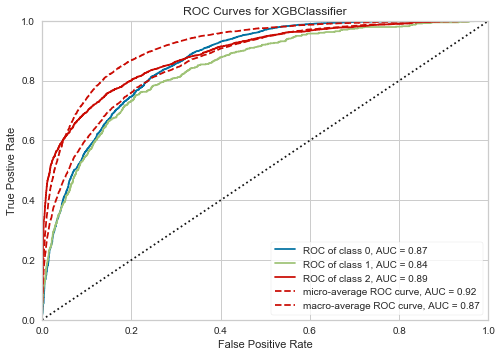

In [97]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(xgb)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()   


In [ ]:
gb_cv = RandomizedSearchCV(xgb, params, cv=5,n_jobs=1)
xgb_cv.fit(X_train_sp, y_train_p)

xgb_y_pred = xgb_cv.predict(X_test_sp)

# The train score
print("Train Score: %.2f" % xgb_cv.score(X_train_sp, y_train_p))

# The test score
print("Test Score: %.2f" % xgb_cv.score(X_test_sp, y_test_p))

price_value = mean_squared_error(y_test_p, xgb_y_pred)
print("MSE: %.2f" % price_value)

print("Error : %.2f" % np.sqrt(price_value))


In [ ]:
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgb = XGBRegressor(nthreads=-1)  

In [57]:
xgb4.fit(X_train_s, y_train)
lr_y_pred = xgb4.predict(X_test_s)
print("xgb4 train score :")
print(xgb4.score(X_train_s, y_train))
print('')
print("xgb4 test score  :")

print(xgb4.score(X_test_s, y_test))

KeyboardInterrupt: 

In [ ]:
our_params = {'eta': 0.1, 'seed':42, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax', 'max_depth':3, 'min_child_weight':1,'num_class': 3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 300, nfold = 3,
                metrics = 'merror', # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [39]:
rfc=RandomForestClassifier()

In [40]:
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test_s)
print("forest train score :")
print(lr.score(X_train, y_train))
print('')
print("forest test score  :")

print(lr.score(X_test, y_test))

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


forest train score :
0.7317425885755604

forest test score  :
0.7295978309986444
